#Get The Data

##Installation

In [ ]:
!pip install ucimlrepo
!pip install jupyter nbconvert
from ucimlrepo import fetch_ucirepo

In [19]:
# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)

# data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

# metadata
print(infrared_thermography_temperature.metadata)
# variable information
print(infrared_thermography_temperature.variables)

{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

##Visualise data and its distribution

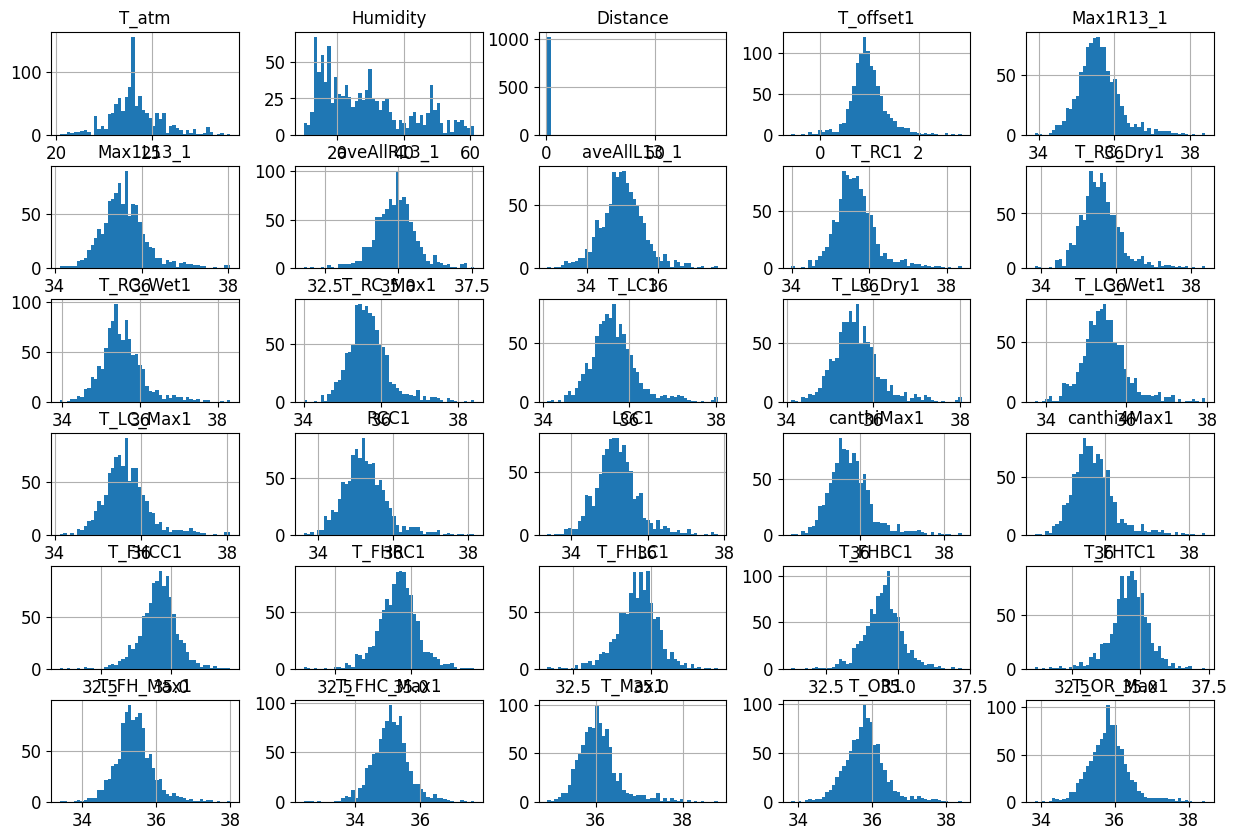

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

mpl.rc('axes', labelsize=14) # font size 14
mpl.rc('xtick', labelsize=12) # etc
mpl.rc('ytick', labelsize=12) # etc

X.hist(bins=50, figsize=(15,10))
plt.show()

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

In [22]:
X.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.573865,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.672461,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.050000,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.213125,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.605000,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.965625,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.125000,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000


In [23]:
y.head()

,aveOralF,aveOralM
0,36.85,36.59
1,37.00,37.19
2,37.20,37.34
3,36.85,37.09
4,36.80,37.04


In [24]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   aveOralF  1020 non-null   float64
 1   aveOralM  1020 non-null   float64
dtypes: float64(2)
memory usage: 16.1 KB


In [25]:
y.describe()

,aveOralF,aveOralM
count,1020.000000,1020.000000
mean,36.979216,37.028382
std,0.386403,0.509502
min,35.750000,35.540000
25%,36.800000,36.777500
50%,36.900000,36.940000
75%,37.100000,37.140000
max,39.600000,40.340000


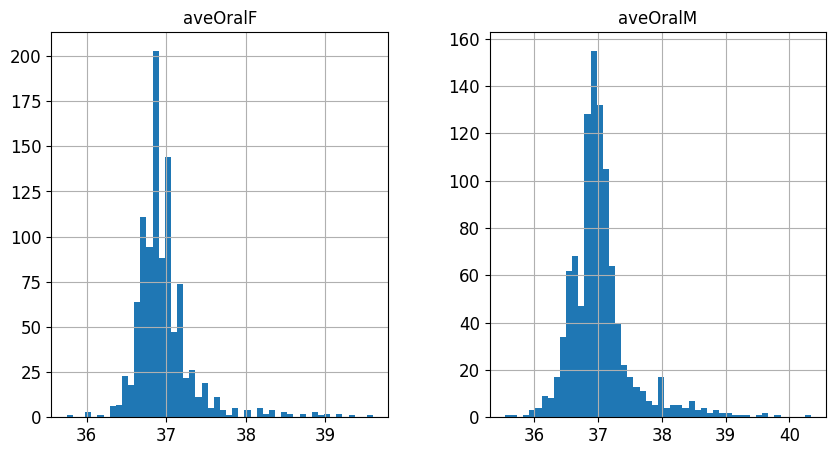

In [26]:
y.hist(bins=50, figsize=(10,5))
plt.show()

In [27]:
OralF_dist = X.copy()


OralF_dist['fasttemp_cat'] = pd.cut(y["aveOralF"],
                               bins=[35, 36, 37, 38, 39, np.inf],
                               labels=[1, 2, 3, 4, 5])

OralF_dist['monitortemp_cat'] = pd.cut(y["aveOralM"],
                               bins=[35, 36, 37, 38, 39, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [28]:
OralF_dist['fasttemp_cat'].value_counts()

,count
fasttemp_cat,
2,694
3,295
4,22
5,6
1,3


In [29]:
OralF_dist['monitortemp_cat'].value_counts()

,count
monitortemp_cat,
2,601
3,364
4,39
5,10
1,6


###Browsing the categorical data

In [30]:
X["Age"].value_counts()

,count
Age,
18-20,534
21-25,355
26-30,67
31-40,31
51-60,11
21-30,10
41-50,9
>60,3


In [31]:
X['Gender'].value_counts()

,count
Gender,
Female,606
Male,414


In [32]:
X['Ethnicity'].value_counts()

,count
Ethnicity,
White,506
Asian,260
Black or African-American,143
Hispanic/Latino,57
Multiracial,50
American Indian or Alaskan Native,4


##Clean the Data

In [33]:
# Separate categorical and numerical columns
categorical_columns = ['Age', 'Ethnicity', 'Gender']
X_categorical = X[categorical_columns]
X_numerical = X.drop(columns=categorical_columns)

Scaled the values of the non categorical features.

In [34]:
from sklearn.preprocessing import StandardScaler
# Initialize and apply StandardScaler only to numerical columns
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)
X_numerical_scaled = pd.DataFrame(X_numerical_scaled, columns=X_numerical.columns)

In [35]:
# One-Hot Encoding
X_categorical_encoded= pd.get_dummies(X_categorical, drop_first=True).astype(int)  # Avoid multicollinearity

# Combine the scaled numerical data with the encoded categorical data
X = pd.concat([X_categorical_encoded, X_numerical_scaled], axis=1)

print(X)
missing_values = X[X.isna().any(axis=1)]
print(missing_values)
X.dropna(inplace=True)
y = y.loc[X.index]

      Age_21-25  Age_21-30  Age_26-30  Age_31-40  Age_41-50  Age_51-60  \
0             0          0          0          0          1          0   
1             0          0          0          1          0          0   
2             0          1          0          0          0          0   
3             0          1          0          0          0          0   
4             0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
1015          1          0          0          0          0          0   
1016          1          0          0          0          0          0   
1017          0          0          0          0          0          0   
1018          0          0          1          0          0          0   
1019          0          0          0          0          0          0   

      Age_>60  Ethnicity_Asian  Ethnicity_Black or African-American  \
0           0                0          

Reduced dataset shape: (1018, 14)
Features removed: ['T_RC1', 'T_RC_Max1', 'T_LC_Max1', 'Max1L13_1', 'T_LC_Wet1', 'T_FHLC1', 'T_FHRC1', 'LCC1', 'Ethnicity_Black or African-American', 'T_OR1', 'canthi4Max1', 'T_LC1', 'Ethnicity_Hispanic/Latino', 'T_FHCC1', 'Age_26-30', 'Ethnicity_Multiracial', 'T_FHBC1', 'Max1R13_1', 'aveAllR13_1', 'Ethnicity_White', 'T_FHC_Max1', 'T_RC_Wet1', 'T_FHTC1', 'aveAllL13_1', 'T_RC_Dry1', 'Age_31-40', 'T_LC_Dry1', 'RCC1', 'canthiMax1']


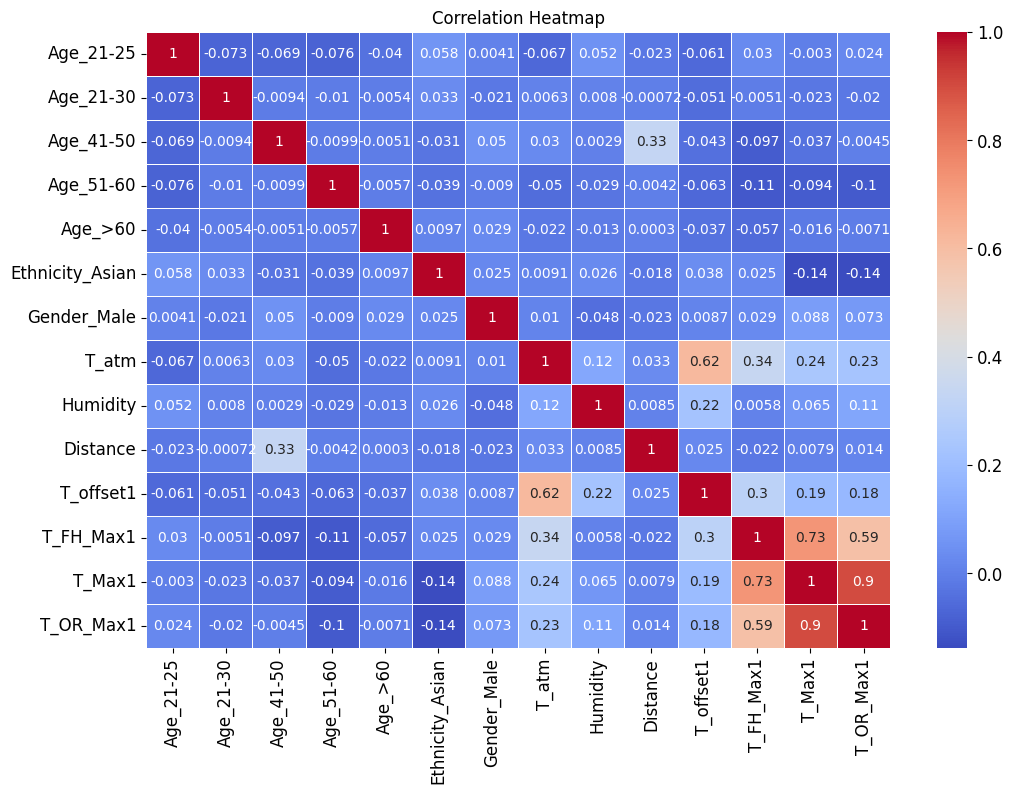

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_keep = ['T_Max1', 'T_OR_Max1']

to_drop = 0

low_correlation_threshold = -0.12
high_correlation_threshold = 0.88

corr_matrix = X.corr()

lower = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
low_corr_columns = [column for column in lower.columns if any(lower[column] < low_correlation_threshold)]

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_columns = [column for column in upper.columns if any(upper[column] > high_correlation_threshold)]


features_to_drop = set(low_corr_columns + high_corr_columns)
features_to_drop = [feature for feature in features_to_drop if feature not in features_to_keep]

data_reduced = X.drop(columns=features_to_drop)

print(f"Reduced dataset shape: {data_reduced.shape}")
print(f"Features removed: {features_to_drop}")

plt.figure(figsize=(12, 8))
sns.heatmap(data_reduced.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The data is both highly correlated and has a large amount of low correlated features making it hard to distinguish whether a feature is affected by multicolinearity or if the many unimportant features are diluting the models abilities to predict. I tried to keep the features that have the greatest affect on prediction after performing some feature importance functions once i had begun to model the data.

#Regression Tasks

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import xgboost as xgb
import shap

In [38]:
# Apply LabelEncoder if the target variables are categorical
y['aveOralF'] = LabelEncoder().fit_transform(y['aveOralF'])
y['aveOralM'] = LabelEncoder().fit_transform(y['aveOralM'])

## Exploring feature importance

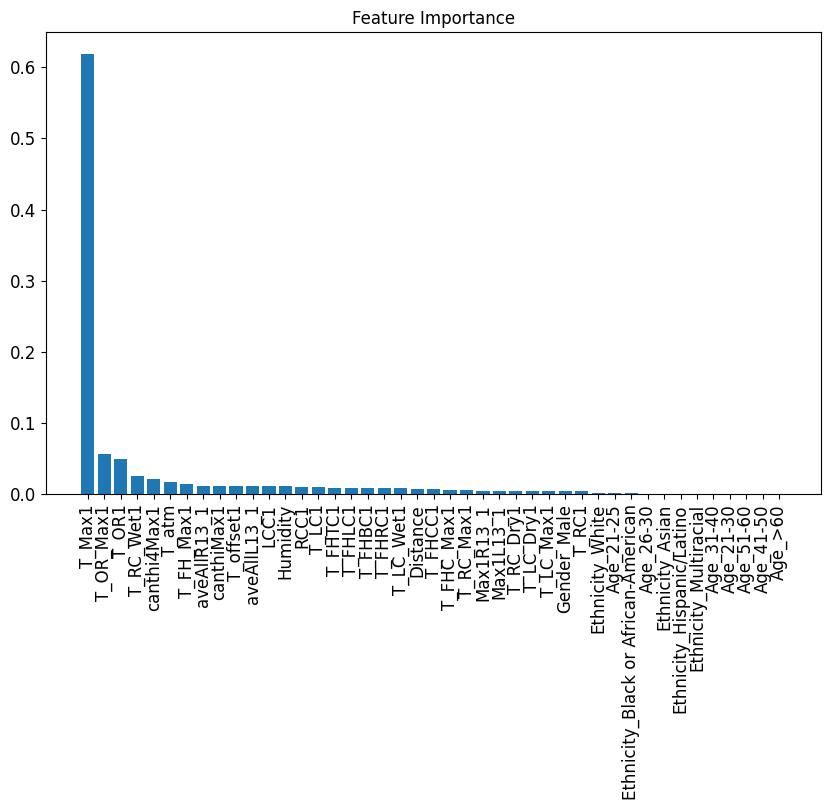

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

feature_importance = rf_model.feature_importances_

# Plot feature importance
features = X.columns
indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

There are many unimportant values involved in the data, this may dilute predictions

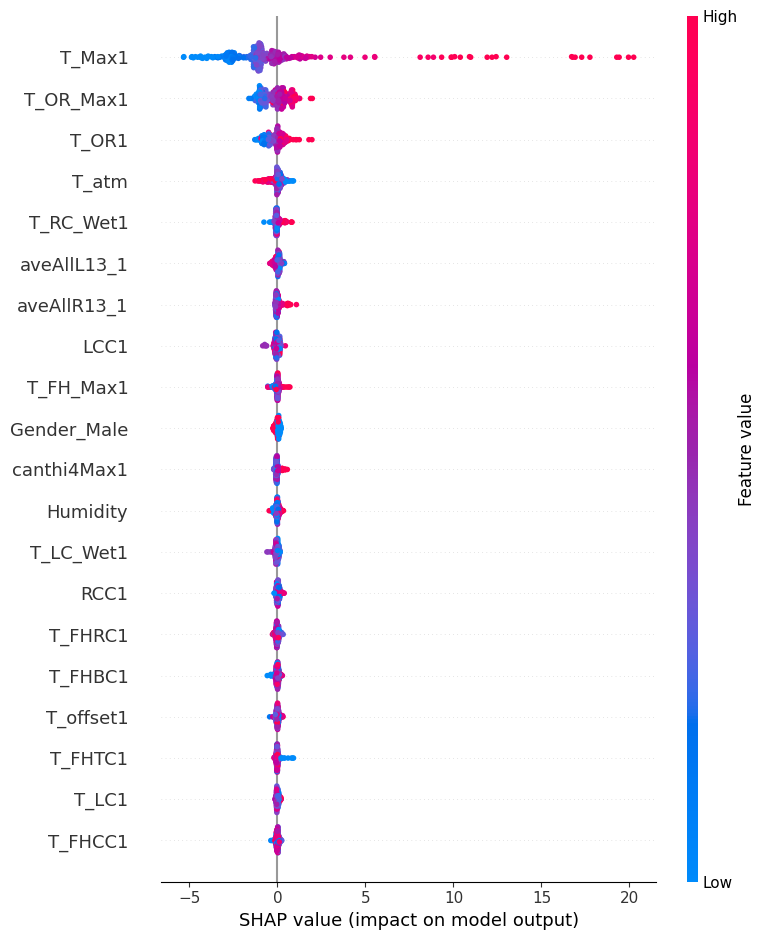

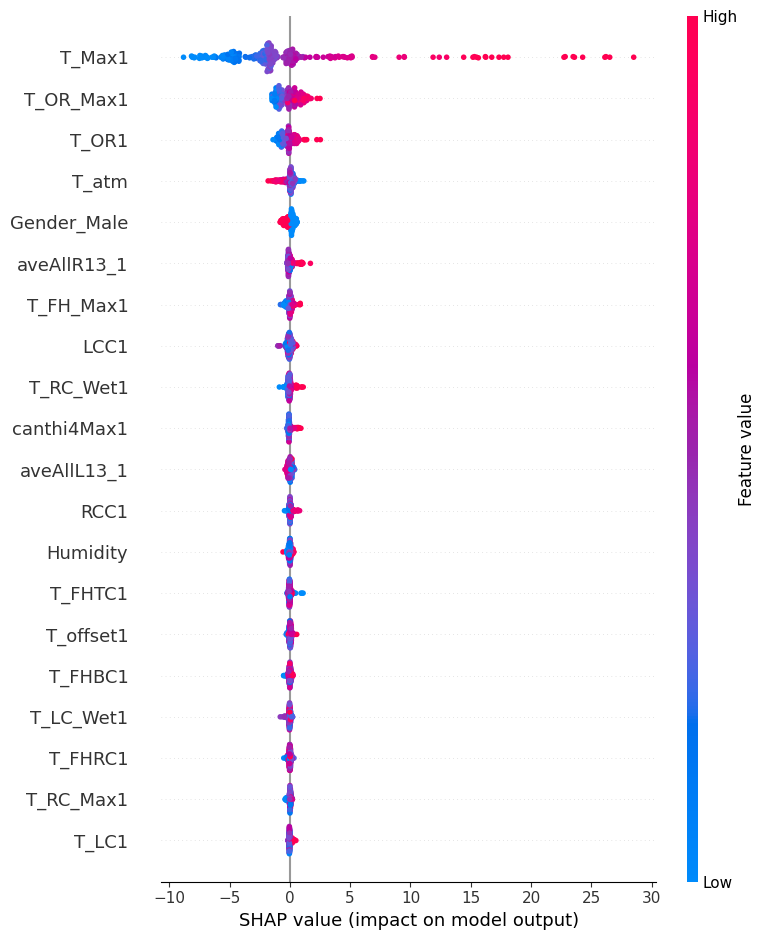

In [40]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Plot a summary plot for both target variables
shap.summary_plot(shap_values[:, :, 0], X_test, title= "Feature importance for aveOralF",
                  plot_type="dot", show=True)  # For aveOralF

shap.summary_plot(shap_values[:, :, 1], X_test, title = "Feature importance for aveOralM",
                  plot_type="dot", show=True)  # For aveOralM


## Modelling the data

###Linear Regression and Random Forrest

In [41]:
n_splits = 10
conf_matrix_sum = np.zeros((2, 2))
precision_list = []
recall_list = []
f1_list = []

results = {
    "LR_mseF": [],
    "LR_mseM": [],
    "LR_r2F": [],
    "LR_r2M": [],
    "RF_mseF": [],
    "RF_mseM": [],
    "RF_r2F": [],
    "RF_r2M": [],
}

In [42]:
for i in range(n_splits):
    print(f"Iteration {i + 1}/{n_splits}...")

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=None)

    # Train the regression model
    lr_model = LinearRegression()
    rf_model = RandomForestRegressor(n_estimators=100, random_state=None)
    lr_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Predictions
    y_predlr = lr_model.predict(X_test)
    y_predrf = rf_model.predict(X_test)

    # Evaluate using Mean Squared Error and R² Score for each target variable
    LR_mse_f = mean_squared_error(y_test['aveOralF'], y_predlr[:, 0])
    LR_mse_m = mean_squared_error(y_test['aveOralM'], y_predlr[:, 1])
    LR_r2_f = r2_score(y_test['aveOralF'], y_predlr[:, 0])
    LR_r2_m = r2_score(y_test['aveOralM'], y_predlr[:, 1])

    results["LR_mseF"].append(LR_mse_f)
    results["LR_mseM"].append(LR_mse_m)
    results["LR_r2F"].append(LR_r2_f)
    results["LR_r2M"].append(LR_r2_m)

    # print(f"Mean Squared Error (aveOralF): {mse_f}")
    # print(f"Mean Squared Error (aveOralM): {mse_m}")
    # print(f"R² Score (aveOralF): {r2_f}")
    # print(f"R² Score (aveOralM): {r2_m}")

    RF_mse_f = mean_squared_error(y_test['aveOralF'], y_predrf[:, 0])
    RF_mse_m = mean_squared_error(y_test['aveOralM'], y_predrf[:, 1])
    RF_r2_f = r2_score(y_test['aveOralF'], y_predrf[:, 0])
    RF_r2_m = r2_score(y_test['aveOralM'], y_predrf[:, 1])

    results["RF_mseF"].append(RF_mse_f)
    results["RF_mseM"].append(RF_mse_m)
    results["RF_r2F"].append(RF_r2_f)
    results["RF_r2M"].append(RF_r2_m)

    # print(f"Mean Squared Error (aveOralF): {mse_f}")
    # print(f"Mean Squared Error (aveOralM): {mse_m}")
    # print(f"R² Score (aveOralF): {r2_f}")
    # print(f"R² Score (aveOralM): {r2_m}")

# Evaluate the 2 models overall performance
print("\nAverage Performance Linear Regression on aveOralF over 10 folds:")
print(f"Average Mean Squared Error (aveOralF): {np.mean(results['LR_mseF'])}")
print(f"Average Mean Squared Error (aveOralM): {np.mean(results['LR_mseM'])}")
print(f"Average R² Score (aveOralF): {np.mean(results['LR_r2F'])}")
print(f"Average R² Score (aveOralM): {np.mean(results['LR_r2M'])}")

print(f"------------------------------------------------------------------------")

print("\nAverage Performance Random Forest on aveOralM over 10 folds:")
print(f"Average Mean Squared Error (aveOralF): {np.mean(results['RF_mseF'])}")
print(f"Average Mean Squared Error (aveOralM): {np.mean(results['RF_mseM'])}")
print(f"Average R² Score (aveOralF): {np.mean(results['RF_r2F'])}")
print(f"Average R² Score (aveOralM): {np.mean(results['RF_r2M'])}")


Iteration 1/10...
Iteration 2/10...
Iteration 3/10...
Iteration 4/10...
Iteration 5/10...
Iteration 6/10...
Iteration 7/10...
Iteration 8/10...
Iteration 9/10...
Iteration 10/10...

Average Performance Linear Regression on aveOralF over 10 folds:
Average Mean Squared Error (aveOralF): 123.99591844486989
Average Mean Squared Error (aveOralM): 73.52773310574004
Average R² Score (aveOralF): -1.6650586862063288
Average R² Score (aveOralM): 0.17468704849522926
------------------------------------------------------------------------

Average Performance Random Forest on aveOralM over 10 folds:
Average Mean Squared Error (aveOralF): 18.29957056547619
Average Mean Squared Error (aveOralM): 23.603608482142853
Average R² Score (aveOralF): 0.6023124437540287
Average R² Score (aveOralM): 0.734725202240644


Average Performance Random Forest on aveOralM over 10 folds:   
Average Mean Squared Error (aveOralF): 17.887620833333333,   
Average Mean Squared Error (aveOralM): 23.09059193452381,   
Average R² Score (aveOralF): 0.5944433383132732,   
Average R² Score (aveOralM): 0.7331285902504872,   

### Hyperparameter tuning

In [43]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

# Grid Search
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


Using those parameters the model performed best over 1 iteration:

 Optimized Mean Squared Error (aveOralF): 21.657621994432258

 Optimized Mean Squared Error (aveOralM): 23.365367600278265

 Optimized R² Score (aveOralF): 0.5473781995039562

 Optimized R² Score (aveOralM): 0.7380508192562567

In [ ]:
yF = y['aveOralF']
yM = y['aveOral M']

In [45]:
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_train)

# Debugging SHAP values shape for regression
print(f"\nShape of shap_values: {shap_values.shape}")
print(f"Number of features in X_train: {X_train.shape[1]}")
print(f"Number of columns in X_train.columns: {len(X_train.columns)}")

shap_importance = np.abs(shap_values).mean(axis=0)#

# Debugging shap_importance shape
print(f"Shape of shap_importance: {shap_importance.shape}")
print(f"Is shap_importance 1D? {shap_importance.ndim == 1}")

shap_df = pd.DataFrame({'Feature': X_train.columns, 'SHAP_Value': shap_importance})
shap_df = shap_df.sort_values(by='SHAP_Value', ascending=False)

threshold = 0.01 * shap_df['SHAP_Value'].max()
important_features = shap_df[shap_df['SHAP_Value'] >= threshold]['Feature'].tolist()

print(f"Selected {len(important_features)} features above SHAP threshold.")
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

print("\nShape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)
print("Important Features:", important_features)



Shape of shap_values: (682, 43, 2)
Number of features in X_train: 43
Number of columns in X_train.columns: 43
Shape of shap_importance: (43, 2)
Is shap_importance 1D? False


ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
n_splits = 10

results1 = {
    "Omse_f": [],
    "Omse_m": [],
    "Or2_f": [],
    "Or2_m": [],
}

y1 = y['aveOralF'].apply(lambda x: 1 if x >= threshold else 0)
y2 = y['aveOralM'].apply(lambda x: 1 if x >= threshold else 0)


In [ ]:
for i in range(n_splits):
    print(f"Iteration {i + 1}/{n_splits}...")

    # Split for aveOralF
    X_train_selected, X_test_selected, y_f_train, y_f_test = train_test_split(X, y1, test_size=0.33, random_state=None)
    # Split for aveOralM
    X_train_selected, X_test_selected, y_m_train, y_m_test = train_test_split(X, y2, test_size=0.33, random_state=None)


    best_rf_model = RandomForestRegressor(
        n_estimators=200,
        min_samples_split=10,
        min_samples_leaf=3,
        max_depth=10,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    )

    # Fit and predict for aveOralF
    best_rf_model.fit(X_train, y_f_train)
    y_f_pred = best_rf_model.predict(X_test)

    # Fit and predict for aveOralM
    best_rf_model.fit(X_train, y_m_train)
    y_m_pred = best_rf_model.predict(X_test)

    # Evaluate performance
    Omse_f = mean_squared_error(y_f_test, y_f_pred)
    Omse_m = mean_squared_error(y_m_test, y_m_pred)
    Or2_f = r2_score(y_f_test, y_f_pred)
    Or2_m = r2_score(y_m_test, y_m_pred)

    results1["Omse_f"].append(Omse_f)
    results1["Omse_m"].append(Omse_m)
    results1["Or2_f"].append(Or2_f)
    results1["Or2_m"].append(Or2_m)

    # print(f"Optimized Mean Squared Error (aveOralF): {mse_f}")
    # print(f"Optimized Mean Squared Error (aveOralM): {mse_m}")
    # print(f"Optimized R² Score (aveOralF): {r2_f}")
    # print(f"Optimized R² Score (aveOralM): {r2_m}")

print("\nAverage Performance Random Forest on aveOralM over {n_splits} folds:")
print(f"Average Mean Squared Error (aveOralF): {np.mean(results1['Omse_f'])}")
print(f"Average Mean Squared Error (aveOralM): {np.mean(results1['Omse_m'])}")
print(f"Average R² Score (aveOralF): {np.mean(results1['Or2_f'])}")
print(f"Average R² Score (aveOralM): {np.mean(results1['Or2_m'])}")



### XGBoost

In [ ]:

XGB_model = XGBRegressor(random_state=42)
XGB_model.fit(X_train, y_train)

# Predictions
y_pred = XGB_model.predict(X_test)

# Evaluate model performance
mse_f = mean_squared_error(y_test['aveOralF'], y_pred[:, 0])
mse_m = mean_squared_error(y_test['aveOralM'], y_pred[:, 1])
r2_f = r2_score(y_test['aveOralF'], y_pred[:, 0])
r2_m = r2_score(y_test['aveOralM'], y_pred[:, 1])

print(f"Mean Squared Error (aveOralF): {mse_f}")
print(f"Mean Squared Error (aveOralM): {mse_m}")
print(f"R² Score (aveOralF): {r2_f}")
print(f"R² Score (aveOralM): {r2_m}")

# Mean Squared Error (aveOralF): 25.36911392211914
# Mean Squared Error (aveOralM): 25.815322875976562
# R² Score (aveOralF): 0.46981191635131836
# R² Score (aveOralM): 0.7105844020843506
# Hyperparameter tuning

In [ ]:
### param_grid_xgb = {
###     'n_estimators': [100, 200],
###     'max_depth': [3, 5, 7],
###     'learning_rate': [0.01, 0.1, 0.2],
###     'subsample': [0.8, 1],
###     'colsample_bytree': [0.8, 1],
###     'gamma': [0, 0.1, 0.2,],
###     'alpha': [0, 0.1, 0.2],
###     'lambda': [0, 0.1, 0.2],
### }

##Best Parameters for XGBoost: {'alpha': 0.2, 'colsample_bytree': 0.8, 'gamma': 0.2, 'lambda': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

# Perform Grid Search
# grid_search_xgb = GridSearchCV(
#     XGB_model, param_grid_xgb, cv=5, scoring='r2', n_jobs=-1
# )
# grid_search_xgb.fit(X_train, y_train)

# Get the best model with optimal parameters
# best_xgb_model = grid_search_xgb.best_estimator_
# print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")


# 2nd param_grid_xgb = {
#     'n_estimators': [100],
#     'max_depth': [3],
#     'learning_rate': [0.1],
#     'subsample': [0.8],
#     'colsample_bytree': [0.6, 0.8],
#     'gamma': [0.2, 0.4, 0.6],
#     'alpha': [0.2, 0.4, 0.6],
#     'lambda': [0.2, 0.4, 0.6],
# }

#Best Parameters for XGBoost: {'alpha': 0.6, 'colsample_bytree': 0.8, 'gamma': 0.4, 'lambda': 0.4, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

In [ ]:
# Make predictions with the best model
for i in range(n_splits):
    print(f"Iteration {i + 1}/{n_splits}...")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=None)

    best_xgb_model = XGBRegressor(
        objective='reg:squarederror', #for regression tasks
        alpha=0.6,
        colsample_bytree=0.8,
        gamma=0.4,
        reg_lambda =0.4,
        learning_rate=0.1,
        max_depth=3,                  #Maximum depth of trees
        n_estimators=100,             #number of boosting rounds
        subsample=0.8,
        random_state=None
    )

    best_xgb_model.fit(X_train, y_train)

    y_pred = best_xgb_model.predict(X_test)

    mse_f = mean_squared_error(y_test['aveOralF'], y_pred[:, 0])
    mse_m = mean_squared_error(y_test['aveOralM'], y_pred[:, 1])
    r2_f = r2_score(y_test['aveOralF'], y_pred[:, 0])
    r2_m = r2_score(y_test['aveOralM'], y_pred[:, 1])

    print(f"2nd Optimized Mean Squared Error (aveOralF): {mse_f}")
    print(f"2nd Optimized Mean Squared Error (aveOralM): {mse_m}")
    print(f"2nd Optimized R² Score (aveOralF): {r2_f}")
    print(f"2nd Optimized R² Score (aveOralM): {r2_m}")


# Evaluate model performance
# mse_f = mean_squared_error(y_test['aveOralF'], y_pred[:, 0])
# mse_m = mean_squared_error(y_test['aveOralM'], y_pred[:, 1])
# r2_f = r2_score(y_test['aveOralF'], y_pred[:, 0])
# r2_m = r2_score(y_test['aveOralM'], y_pred[:, 1])

# print(f"Optimized Mean Squared Error (aveOralF): {mse_f}")
# print(f"Optimized Mean Squared Error (aveOralM): {mse_m}")
# print(f"Optimized R² Score (aveOralF): {r2_f}")
# print(f"Optimized R² Score (aveOralM): {r2_m}")

# Optimized Mean Squared Error (aveOralF): 20.72849464416504
# Optimized Mean Squared Error (aveOralM): 22.51999855041504
# Optimized R² Score (aveOralF): 0.5667960047721863
# Optimized R² Score (aveOralM): 0.7475282549858093


# 2nd Optimized Mean Squared Error (aveOralF): 20.698486328125
# 2nd Optimized Mean Squared Error (aveOralM): 22.321182250976562
# 2nd Optimized R² Score (aveOralF): 0.5674231648445129
# 2nd Optimized R² Score (aveOralM): 0.7497571706771851

# Classification (37.5C)


Performing classification checks for fever, if aveOralF/ aveOralM is over 37.5 then fever if not, classify it as not fever

##Preprocessing (defining classes)

In [ ]:
# Define the fever threshold
threshold = 37.5

# Convert aveOralF and aveOralM to binary categorical variables
y1= y['aveOralF'].apply(lambda x: 1 if x >= threshold else 0)
y2 = y['aveOralM'].apply(lambda x: 1 if x >= threshold else 0)

display(y1[y1.isna()])
display(y2[y2.isna()])

# Convert to string labels ('fever' or 'not_fever')
# y['aveOralF'] = y['aveOralF'].replace({1: 'fever', 0: 'not_fever'})
# y['aveOralM'] = y['aveOralM'].replace({1: 'fever', 0: 'not_fever'})
print(y1)
print(y2)


In [ ]:
# Check the transformed y for correct tranformation
print(y1[y1 == 1])
print(y2[y2 == 1])

# split y dataframe (2 columns) into two dataframes y1 and y2
y1 = pd.DataFrame(y1, columns=['aveOralF'])
y2 = pd.DataFrame(y2, columns=['aveOralM'])
# Convert y to 1D
y1 = y1.values.ravel()
y2 = y2.values.ravel()

## Logistic Regression and Random Forrest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
n_splits = 50

conf_matrix_sum1 = np.zeros((2, 2))
conf_matrix_sum2 = np.zeros((2, 2))

precision_list1lr = []
precision_list2lr = []
recall_list1lr = []
recall_list2lr = []
f1_list1lr = []
f1_list2lr = []

precision_list1rf = []
precision_list2rf = []
recall_list1rf = []
recall_list2rf = []
f1_list1rf = []
f1_list2rf = []

results = {
    "LR1": [],
    "LR2": [],
    "RF1": [],
    "RF2": [],
}

In [ ]:
for i in range(n_splits):
    print(f"Iteration {i + 1}/{n_splits}...")

    # Re-split the data for y1('aveOralF') and y2('aveOralM')
    X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.33, random_state=None)
    X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.33, random_state=None)

    # Initialise the models
    lr_model = LogisticRegression(class_weight={0: 1, 1: 10}) #Assigned a higher class weight to positive predictions to improve its recall
    rf_model = RandomForestClassifier(class_weight={0: 1, 1: 10}, n_estimators=100, random_state=42)

    # Train the model
    lr_model.fit(X_train, y1_train)
    lr_model.fit(X_train, y2_train)

    y1lr_pred = lr_model.predict(X_test)
    y2lr_pred = lr_model.predict(X_test)


    # Store the accuracy for aveOralF
    accuracy_iterlr1 = accuracy_score(y2_test, y2lr_pred)
    results["LR1"].append(accuracy_iterlr1)

    precision_1lr, recall_1lr, f1_1lr, _ = precision_recall_fscore_support(y1_test, y1lr_pred, average='binary', pos_label=1)
    precision_list1lr.append(precision_1lr)
    recall_list1lr.append(recall_1lr)
    f1_list1lr.append(f1_1lr)

    # Store the accuracy for aveOralM
    accuracy_iterlr2 = accuracy_score(y2_test, y2lr_pred)
    results["LR2"].append(accuracy_iterlr2)

    precision_2lr, recall_2lr, f1_2lr, _ = precision_recall_fscore_support(y2_test, y2lr_pred, average='binary', pos_label=1)
    precision_list2lr.append(precision_2lr)
    recall_list2lr.append(recall_2lr)
    f1_list2lr.append(f1_2lr)

    # print(f"Logistic Regression aveOralF Accuracy: {accuracy_score(y1_test, y1lr_pred)}")
    # print(classification_report(y1_test, y1lr_pred))

    # print(f"Logistic Regression aveOralM Accuracy: {accuracy_score(y2_test, y2lr_pred)}")
    # print(classification_report(y2_test, y2lr_pred))

    #random forrest
    rf_model.fit(X_train, y1_train)
    rf_model.fit(X_train, y2_train)

    y1rf_pred = rf_model.predict(X_test)
    y2rf_pred = rf_model.predict(X_test)

    # Generate confusion matrix for oral fast
    conf_matrix1 = confusion_matrix(y1_test, y1rf_pred)
    conf_matrix_sum1 += conf_matrix1
    accuracy_iterrf1 = accuracy_score(y1_test, y1rf_pred)
    results["RF1"].append(accuracy_iterrf1)

    # Generate confusion matrix for oral monitor
    conf_matrix2 = confusion_matrix(y2_test, y2rf_pred)
    conf_matrix_sum2 += conf_matrix2
    accuracy_iterrf2 = accuracy_score(y2_test, y2rf_pred)
    results["RF2"].append(accuracy_iterrf2)

    # print(f"Random Forest aveOralF Accuracy: {accuracy_score(y1_test, y1rf_pred)}")
    # print(classification_report(y1_test, y1rf_pred))

    # Calculate precision, recall, f1 for aveOralF
    precision_1rf, recall_1rf, f1_1rf, _ = precision_recall_fscore_support(y1_test, y1rf_pred, average='binary', pos_label=1)
    precision_list1rf.append(precision_1rf)
    recall_list1rf.append(recall_1rf)
    f1_list1rf.append(f1_1rf)

    # print(f"Random Forest aveOralM Accuracy: {accuracy_score(y2_test, y2rf_pred)}")
    # print(classification_report(y2_test, y2rf_pred))

    # Calculate precision, recall, f1 for aveOralF
    precision_2rf, recall_2rf, f1_2rf, _ = precision_recall_fscore_support(y2_test, y2rf_pred, average='binary', pos_label=1)
    precision_list2rf.append(precision_2rf)
    recall_list2rf.append(recall_2rf)
    f1_list2rf.append(f1_2rf)


print("\nAverage Performance (Logistic Regression & Random Forest aveOralF):")
print(f"Logistic Regression aveOralF Accuracy: {np.mean(results['LR1'])}")
print(f" Average Precision: {np.mean(precision_list1lr)}")
print(f" Average Recall: {np.mean(recall_list1lr)}")
print(f" Average F1 Score: {np.mean(f1_list1lr)}")

print(f"Random Forrest aveOralF Accuracy: {np.mean(results['RF1'])}")
print(f" Average Precision: {np.mean(precision_list1rf)}")
print(f" Average Recall: {np.mean(recall_list1rf)}")
print(f" Average F1 Score: {np.mean(f1_list1rf)}")
print(f"Confusion Matrix Sum:\n{conf_matrix_sum1}")

print(f"---------------------------------------------------------------------------")

print("\nAverage Performance (Logistic Regression & Random Forest aveOralM):")
print(f"Logistic Regression aveOralM Accuracy: {np.mean(results['LR2'])}")
print(f" Average Precision: {np.mean(precision_list2lr)}")
print(f" Average Recall: {np.mean(recall_list2lr)}")
print(f" Average F1 Score: {np.mean(f1_list2lr)}")

print(f"Random Forrest aveOralM Accuracy: {np.mean(results['RF2'])}")
print(f"Average Precision: {np.mean(precision_list2rf)}")
print(f"Average Recall: {np.mean(recall_list2rf)}")
print(f"Average F1 Score: {np.mean(f1_list2rf)}")
print(f"Confusion Matrix Sum:\n{conf_matrix_sum2}")

In [ ]:
labels = ['Fever', 'Not Fever']

# Create a custom confusion matrix where TP is top-left, TN is bottom-right
conf_matrix_custom = np.array([[conf_matrix_sum1[1, 1], conf_matrix_sum1[0, 1]],  # TP, FP
                      [conf_matrix_sum1[1, 0], conf_matrix_sum1[0, 0]]], dtype=int)  # FN, TN

print("Averaged Confusion Matrix AveOralF:\n", conf_matrix_custom)

conf_matrix_avg = conf_matrix_custom / n_splits

# Plot the confusion matrix with labeled axes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_avg, annot=True, fmt=".1f", cmap="Blues",
            yticklabels=labels, xticklabels=labels)

# Add axis labels and title
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# Evaluate the model
print(f"Accuracy: {accuracy_score(y1_test, y1rf_pred)}")
print(classification_report(y1_test, y1rf_pred))

In [ ]:
# Create a custom confusion matrix where TP is top-left, TN is bottom-right
conf_matrix_custom2 = np.array([[conf_matrix_sum2[1, 1], conf_matrix_sum2[0, 1]],  # TP, FP
                      [conf_matrix_sum2[1, 0], conf_matrix_sum2[0, 0]]], dtype=int)  # FN, TN

print("Averaged Confusion Matrix AveOralM:\n", conf_matrix_custom2)

conf_matrix_avg2 = conf_matrix_custom2 / n_splits

# Plot the confusion matrix with labeled axes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_avg2, annot=True, fmt=".1f", cmap="Blues",
            yticklabels=labels, xticklabels=labels)

# Add axis labels and title
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# Evaluate the model
print(f"Accuracy: {accuracy_score(y2_test, y2rf_pred)}")
print(classification_report(y2_test, y2rf_pred))

# Evaluation

After going through some classification and regression models, there were benefits with both types. The regression models were easier to optimise and could be tailored to the task but showed signs of missing the trends in the data, most likely due to overfitting, specifically with random forest. I had tried to circumvent this by using a wide range of parameters and trying to find the best fit using the GridSearchCV library to find the optimum parameters but the F1 score decreased drastically compared to just using the standard random forest model. This suggested that while the MSE decreased, the model could not tell what caused it and was performing essentially guess work.

The classification models had better precision and recall overall. I usedights of the models to treat a positive diagnosis with more importance as the dataset is based in the medical field, meaning that for health and safety there should be a bias toward these positve predictions. I was able to perform some basic monte carlo loops to try show a more consistent read on the models performances. Though due to lack of computation power and the time constraints from processing I wasnt able to perform as many iterations as I had hoped to.

I tried adjusting thresholds, changing hyperparameters, and running cross-validation, but the performance on both aveOralF and aveOralM could be improved. I did observe that the R² is still quite low overall, which might indicate the need for further data preprocessing or alternative algorithms. I also went through some SHAP analysis to interpret random forest regression's prediction and to visualise feature importance, I observed extremely low correlation throughout the independant variables but also extremely high correlation with the T_Max1 feature (temperature of the whole face) which had also been shown to have the highest feature importance.
